# Image Classification Using Deep Learning
Given an image, this application will provide a prediciton.

In [ ]:
!pip install pillow
!pip install pandas
!pip install tensorflow
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow
from tensorflow.python.keras import layers
import base64
import io
from tensorflow.python.keras.models import Sequential
import pandas
import numpy
import itertools
from PIL import Image

dog_breeds = ['.ipynb_checkpoints', 'beagle', 'bernese_mountain_dog', 'doberman', 'labrador_retriever', 'siberian_husky']
data_arguments = {"labels": "inferred", "label_mode": "categorical", "batch_size": 32, "image_size": (256, 256), "seed": 1, "validation_split": 0.2, "class_names": dog_breeds}
training_data = tensorflow.keras.utils.image_dataset_from_directory("images", subset = "training", **data_arguments) #creates tensorflow dataset

Found 926 files belonging to 6 classes.
Using 741 files for training.


In [ ]:
test_data = tensorflow.keras.utils.image_dataset_from_directory("images", subset = "validation", **data_arguments) #80% used for training and 20% used for testing

Found 926 files belonging to 6 classes.
Using 185 files for validation.


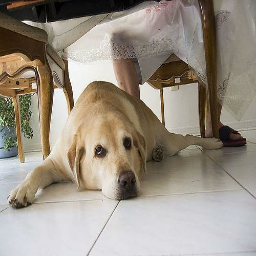

In [ ]:
first_batch = training_data.take(1) #takes the first batch which contains 32 images
imgs, labels = list(first_batch)[0]
image_one = imgs[0]
Image.fromarray(image_one.numpy().astype("uint8")) #displays the image from the given array

In [ ]:
#performance optimizations
training_data = training_data.cache().prefetch(buffer_size = tensorflow.data.AUTOTUNE) #loads images from memory (faster than obtaining it from your drive)
test_data = test_data.cache().prefetch(buffer_size = tensorflow.data.AUTOTUNE)

#rescale all pixel values to 0-1 format (neural networks work best when they use 0s or 1s) 
#uses convolutional layers to extract key features
#convert those obtained features into predictions (last three)
model = Sequential([tensorflow.keras.layers.Rescaling(1./255), layers.Conv2D(16, 3, padding = "same", activation = "relu", input_shape = (256,256,3)), layers.Flatten(), layers.Dense(128, activation = "relu"), layers.Dense(len(dog_breeds))])

#optimizer = how to update each run of the model
#loss function to deal with error
model.compile(optimizer = "adam", loss = tensorflow.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ["accuracy"]) 

#fit model to the training dataset
run = model.fit(training_data, validation_data = test_data, epochs = 5, verbose = 1)

Epoch 1/5
24/24 [==============================] - 61s 2s/step - loss: 50.3198 - accuracy: 0.2200 - val_loss: 6.8334 - val_accuracy: 0.2757
Epoch 2/5
24/24 [==============================] - 47s 2s/step - loss: 3.0367 - accuracy: 0.3104 - val_loss: 2.0853 - val_accuracy: 0.1784
Epoch 3/5
24/24 [==============================] - 47s 2s/step - loss: 1.0224 - accuracy: 0.6518 - val_loss: 1.8417 - val_accuracy: 0.2973
Epoch 4/5
24/24 [==============================] - 47s 2s/step - loss: 0.3996 - accuracy: 0.9177 - val_loss: 1.9704 - val_accuracy: 0.2811
Epoch 5/5
24/24 [==============================] - 46s 2s/step - loss: 0.1004 - accuracy: 0.9852 - val_loss: 1.9918 - val_accuracy: 0.3135


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_7 (ModuleWrap (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
flatten_6 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               134217856 
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 774       
Total params: 134,219,078
Trainable params: 134,219,078
Non-trainable params: 0
_________________________________________________________________


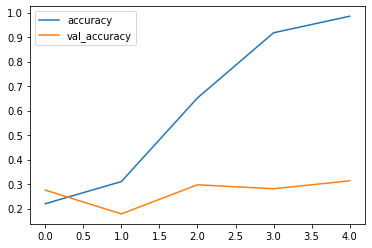

In [ ]:
#graphing accuracy

check_accuracy = pandas.DataFrame.from_dict(run.history)
check_accuracy[["accuracy", "val_accuracy"]].plot() #too much overfitting

In [ ]:
#improving the model to avoid overfitting
#function to train the model (uses previous code)
def train(training_network, epochs = 10):
  training_model = Sequential(training_network)
  training_model.compile(optimizer = "adam", loss = tensorflow.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ["accuracy"]) 
  run = training_model.fit(training_data, validation_data = test_data, epochs = epochs)
  check_accuracy = pandas.DataFrame.from_dict(run.history)
  return check_accuracy, training_model

#model changes
#increased size window from 3 to 4
#added max pooling layer (reduces overfitting by reduction of parameters and makes it go faster)
# added another 2d convolution at 32 and another max pooling layer
# added another 2d convolution at 64 and another max pooling layer
# added dropout layer which fights overfitting (randomly sets outputs to 0)
training_network = [tensorflow.keras.layers.Rescaling(1./255), layers.Conv2D(16, 4, padding = "same", activation = "relu", input_shape = (256,256,3)), layers.MaxPooling2D(), layers.Conv2D(32, 4, padding = "same", activation = "relu", input_shape = (256,256,3)), layers.MaxPooling2D(), layers.Conv2D(64, 4, padding = "same", activation = "relu", input_shape = (256,256,3)), layers.MaxPooling2D(), layers.Dropout(0.2), layers.Flatten(), layers.Dense(128, activation = "relu"), layers.Dense(len(dog_breeds))]

#run the model
check_accuracy, model = train(training_network)

Epoch 1/10
24/24 [==============================] - 68s 3s/step - loss: 2.0012 - accuracy: 0.2065 - val_loss: 1.5905 - val_accuracy: 0.2541
Epoch 2/10
24/24 [==============================] - 66s 3s/step - loss: 1.4775 - accuracy: 0.3468 - val_loss: 1.4862 - val_accuracy: 0.3622
Epoch 3/10
24/24 [==============================] - 67s 3s/step - loss: 1.2459 - accuracy: 0.4993 - val_loss: 1.5197 - val_accuracy: 0.3243
Epoch 4/10
24/24 [==============================] - 66s 3s/step - loss: 0.9915 - accuracy: 0.6289 - val_loss: 1.7457 - val_accuracy: 0.3135
Epoch 5/10
24/24 [==============================] - 66s 3s/step - loss: 0.6662 - accuracy: 0.7598 - val_loss: 2.0865 - val_accuracy: 0.2973
Epoch 6/10
24/24 [==============================] - 67s 3s/step - loss: 0.4186 - accuracy: 0.8489 - val_loss: 2.6621 - val_accuracy: 0.3189
Epoch 7/10
24/24 [==============================] - 67s 3s/step - loss: 0.2813 - accuracy: 0.9028 - val_loss: 3.2586 - val_accuracy: 0.2865
Epoch 8/10
24/24 [==

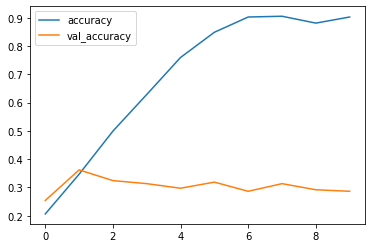

In [ ]:
check_accuracy[["accuracy", "val_accuracy"]].plot() #better but overfitting is still a problem

In [ ]:
#data augmentation to help with overfitting
#generates more data instead of having to take more pictures
#random flipping of image orientation
#random zooming in of images
augmented_network = tensorflow.keras.Sequential([tensorflow.keras.layers.RandomFlip("horizontal", seed=1), tensorflow.keras.layers.RandomRotation(0.2, seed=1), tensorflow.keras.layers.RandomZoom(0.2, seed=1)])

#add it to the current network
complete_network = training_network + [augmented_network]

#run the model again
check_accuracy, model = train(training_network)

Epoch 1/10
24/24 [==============================] - 65s 3s/step - loss: 0.1100 - accuracy: 0.9649 - val_loss: 4.8288 - val_accuracy: 0.2541
Epoch 2/10
24/24 [==============================] - 70s 3s/step - loss: 0.0493 - accuracy: 0.9879 - val_loss: 5.5194 - val_accuracy: 0.2865
Epoch 3/10
24/24 [==============================] - 66s 3s/step - loss: 0.0321 - accuracy: 0.9919 - val_loss: 6.3177 - val_accuracy: 0.2973
Epoch 4/10
24/24 [==============================] - 67s 3s/step - loss: 0.0301 - accuracy: 0.9946 - val_loss: 5.5211 - val_accuracy: 0.3027
Epoch 5/10
24/24 [==============================] - 67s 3s/step - loss: 0.0339 - accuracy: 0.9946 - val_loss: 7.1217 - val_accuracy: 0.3081
Epoch 6/10
24/24 [==============================] - 66s 3s/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 7.3008 - val_accuracy: 0.2919
Epoch 7/10
24/24 [==============================] - 67s 3s/step - loss: 0.0211 - accuracy: 0.9960 - val_loss: 9.4705 - val_accuracy: 0.2541
Epoch 8/10
24/24 [==

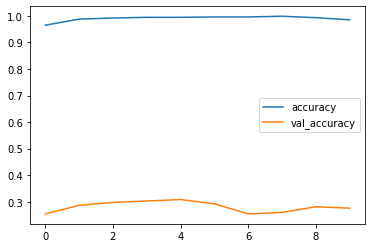

In [ ]:
check_accuracy[["accuracy", "val_accuracy"]].plot()

In [ ]:
#check predictions vs actual through visualization
predictions = model.predict(test_data)

#convert with numpy to better visualize
predictions = numpy.argmax(predictions, axis = 1)

#actual
actual = numpy.concatenate([b for a,b in test_data], axis = 0)
actual = numpy.argmax(actual, axis = 1)

#look at image as well
actual_img = [a.numpy().astype("uint8") for a,b in test_data]
actual_img = list(itertools.chain.from_iterable(actual_img))
actual_img = [Image.fromarray(a) for a in actual_img]

pred_frame = pandas.DataFrame(zip(predictions, actual, actual_img), columns = ["Predictions", "Actual", "Image"])
pred_frame["Predictions"] = pred_frame["Predictions"].apply(lambda x: dog_breeds[x])
pred_frame["Actual"] = pred_frame["Actual"].apply(lambda x: dog_breeds[x])

In [ ]:
pred_frame.head()

,Predictions,Actual,Image
0,bernese_mountain_dog,siberian_husky,<PIL.Image.Image image mode=RGB size=256x256 a...
1,labrador_retriever,bernese_mountain_dog,<PIL.Image.Image image mode=RGB size=256x256 a...
2,siberian_husky,labrador_retriever,<PIL.Image.Image image mode=RGB size=256x256 a...
3,beagle,labrador_retriever,<PIL.Image.Image image mode=RGB size=256x256 a...
4,siberian_husky,beagle,<PIL.Image.Image image mode=RGB size=256x256 a...


# Not the best image classifier for dogs, but it does a decent job.

,Predictions,Actual,Image
0,bernese_mountain_dog,siberian_husky,
1,labrador_retriever,bernese_mountain_dog,
2,siberian_husky,labrador_retriever,
3,beagle,labrador_retriever,
4,siberian_husky,beagle,
5,bernese_mountain_dog,labrador_retriever,
6,bernese_mountain_dog,doberman,
7,doberman,doberman,
8,bernese_mountain_dog,doberman,
9,bernese_mountain_dog,bernese_mountain_dog,

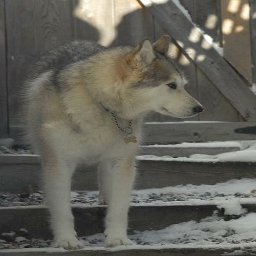
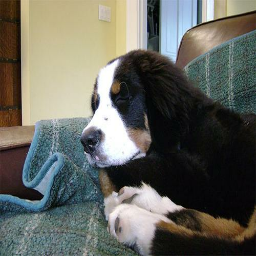
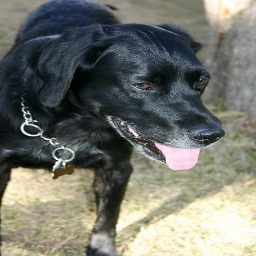
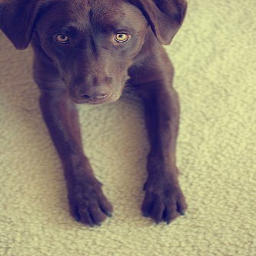
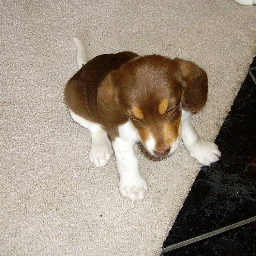
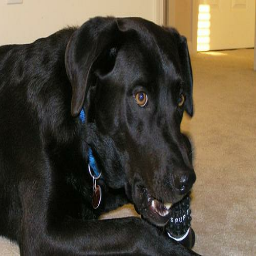
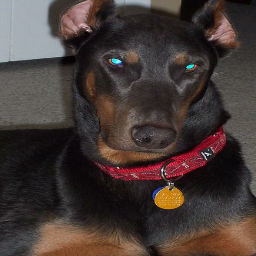
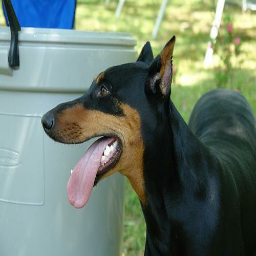
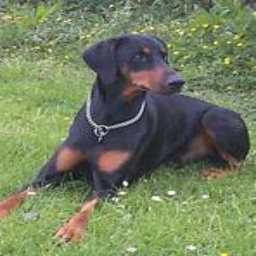
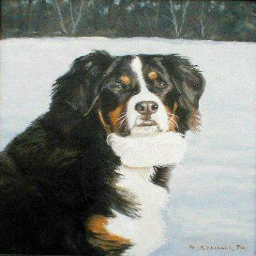
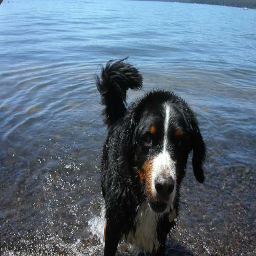
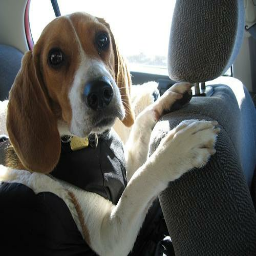
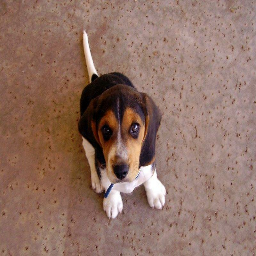
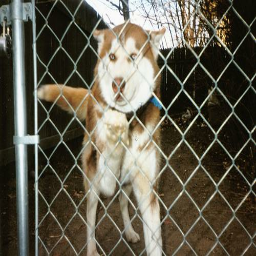
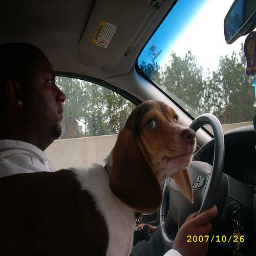
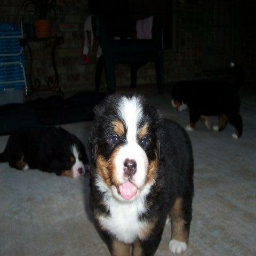
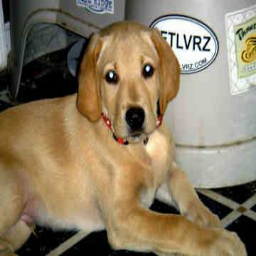
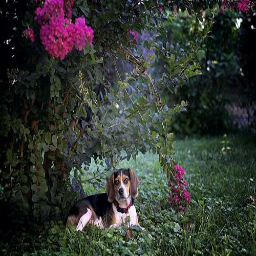
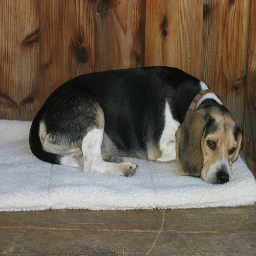
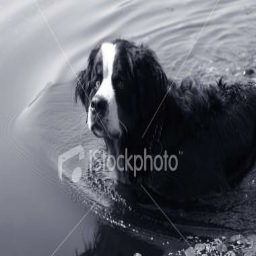

In [ ]:
#show image
def see_image(image):
  with io.BytesIO() as buffer:
    image.save(buffer, 'png')
    img2str = base64.b64encode(buffer.getvalue()).decode()
    return f'<img src="data:image/jpeg;base64,{img2str}">'

pred_frame.head(20).style.format({'Image': see_image})